In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas import read_csv,set_option
import numpy as np
from sklearn.feature_selection import SelectKBest,chi2,RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold,cross_val_score,LeaveOneOut,train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from time import time
from sklearn.metrics import f1_score,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.externals import joblib
import seaborn as sns
from sklearn.naive_bayes import GaussianNB


# data exploration

In [2]:
data = pd.read_csv('training.csv')
data.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [3]:
data.columns

Index(['ID', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3',
       'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9',
       'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19',
       'Latitude', 'Longitude', 'mobile_money', 'savings', 'borrowing',
       'insurance', 'mobile_money_classification'],
      dtype='object')


## **COLUMNS**      **EXPLANATIONS**
- Q1                    *Age*
- Q2                     gender(1 - Male , 2-Female )
- Q3                   Marital status(1 Married 2 Divorced 3 Widowed 4 Single/never married)
- Q4                   Highest level of education completed?(1 No formal education 2 Some primary 3 Primary completed 4 Post                           primary technical training 5 Some secondary 6 University or other higher education 7 Don’t know)
- Q5                   Which of the following applies to you? Read out; Single response(1 You personally own the land/plot                             where you live2 You own the land/plot together with someone else 3 A household member owns the                                 land/plot 4 The land/plot is rented 5 You don’t own or rent the land 6 Don’t know )
- Q6                   Do you personally own land (other than the land you live on) that you have land certificates of ownership for?(1 Yes 2 No)
- Q7                   Do you personally own a mobile phone?(1 YES 2 NO)
- **Q8_1 through Q8_11	Different people have different ways of getting money, please tell me how you get the money you spend?Multiple mention possible**
- Q8_1      	Salaries/wages(1 yes 2 no)
- Q8_2	Money from trading/selling   Anything you produce/grow/raise/make/collect with the intention of selling(1 Yes 0 No)
- Q8_3	Money from providing a service – i.e. such as transport, hairdressing, processing, hospitality services (food & accommodation)(1 Yes 0 No)
- Q8_4	Piece work/Casual labor/Occasional jobs(1 Yes 0 No)
- Q8_5	Rental income(1 Yes 0 No) 
- Q8_6	Interest from savings, investments, stocks, unit trusts etc.(1 Yes 0 No)
- Q8_7	Pension(1 Yes 0 No)
- Q8_8	Social welfare money/grant from Government(1 Yes 0 No)
- Q8_9	Rely on someone else/others to give/send me money(1 Yes 0 No)
- Q8_10	Don’t get money – someone else pays my expenses(1 Yes 0 No)
- Q8_11	Other(1 Yes 0 No)
- 	Only for those who said they get a salary/wages. Who do you work for?   	-1 not applicable
1 Government
2 Private company/business
3 Individual who owns his own business
4 Small scale farmer
5 Commercial farmer 
6 Work for individual/household e.g. security guard, maid etc. 
7 Other
- 0	Only for those who said they get money from selling things – what kind of things do you MAINLY sell (get most money from)?	-1 not applicable
1 Crops/produce I grow
2 Products I get from livestock
3 Livestock 
4 Fish you catch yourself/aquaculture
5 Things you buy from others – agricultural products
6 Things you buy from others – non-agricultural products
7 Things you make (clothes, art, crafts)
8 Things you collect from nature (stones, sand, thatch, herbs)
9 Things you process (honey, dairy products, flour)
10 Other
- 1	Only for those who said they get money from providing a service – what kind of services do you MAINLY provide (get most money from)?	-1 not applicable
1 Personal services (hairdressers, massage, etc.) 
2 Telecommunications/IT
3 Financial services 
4 Transport 
5 Hospitality – Accommodation, restaurants, etc. 
6 Information/research 
7 Technical – mechanic, etc. 
8 Educational/child care 
9 Health services – traditional healer etc. 
10 Legal services 
11 Security 
12 Other, specify
- 2	In the past 12 months, have you sent money to someone in a different place within the country or outside of Tanzania?	1 Yes
2 No
- 3	When did you last send money?	-1 not applicable
1 Yesterday/today 
2 In the past 7 days 
3 In the past 30 days 
4 In the past 90 days 
5 More than 90 days ago but less than 6 months ago  
6 6 months or longer ago
- 4	In the past 12 months, have you received money from someone in a different place within the country or from outside the country?	( es  No)
- Q15 en did you last receive money?(-1 not applicable  Yesterday/today 2 In the past 7 days 3 In the past 30 days 4 In the past 90 days 5 More than 90 days ago but less than 6 months ago 6 6 months or longer ago)
- Q16	In the past 12 months, how often did you use mobile money for purchases of goods and/or services?	-1 not applicable(1 Never 2 Daily 3 Weekly 4 Monthly 5 Less often than monthly)
- Q17	In the past 12 months, how often did you use mobile money for paying your bills?	-1 not applicable(1 Never 2 Daily 3 Weekly 4 Monthly 5 Less often than monthly)
- Q18	Literacy in Kiswhahili(1 Can read and write 2 Can read only 3 Can write only 4 Can neither read nor write 5 Refused to read)
- Q19	Literacy in English	(1 Can read and write 2 Can read only 3 Can write only 4 Can neither read nor write 5 Refused to read)



In [4]:
data.shape

(7094, 37)

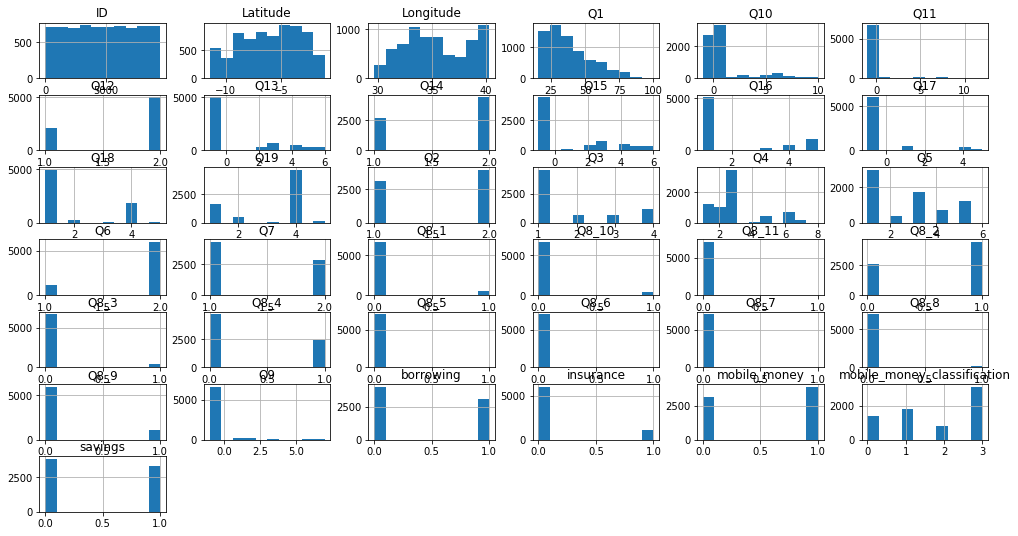

In [5]:
data.hist(figsize=(17,9));

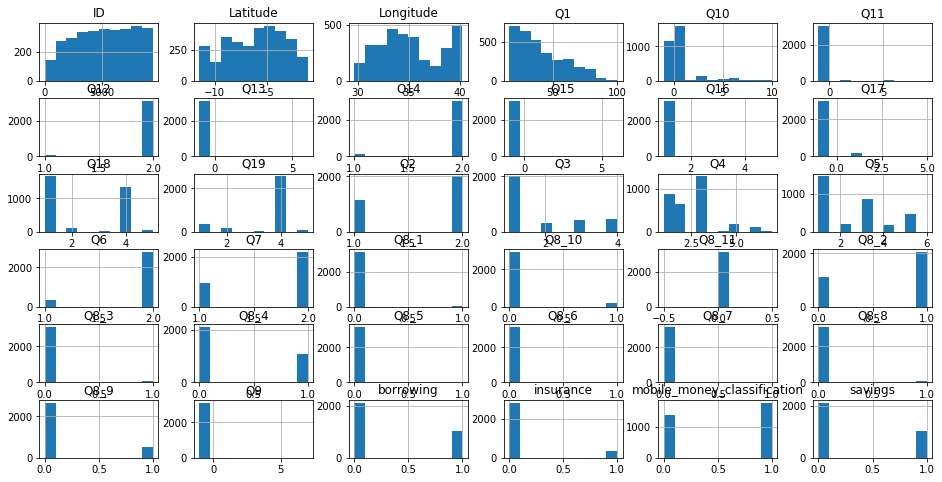

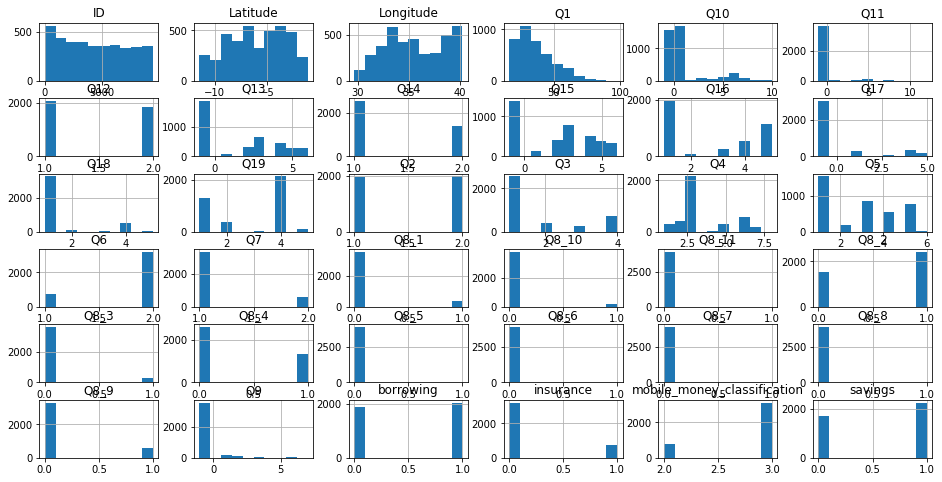

In [6]:
data.groupby('mobile_money').hist(figsize=(16,8));

# Observation and Preparation of data

In [7]:
# checking for null values in the dataset
data.isnull().sum()

ID                             0
Q1                             0
Q2                             0
Q3                             0
Q4                             0
Q5                             0
Q6                             0
Q7                             0
Q8_1                           0
Q8_2                           0
Q8_3                           0
Q8_4                           0
Q8_5                           0
Q8_6                           0
Q8_7                           0
Q8_8                           0
Q8_9                           0
Q8_10                          0
Q8_11                          0
Q9                             0
Q10                            0
Q11                            0
Q12                            0
Q13                            0
Q14                            0
Q15                            0
Q16                            0
Q17                            0
Q18                            0
Q19                            0
Latitude  

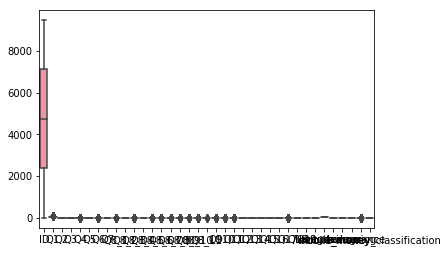

In [8]:
fig, ax = plt.subplots()
sns.boxplot(data=data, orient='p')
plt.show()

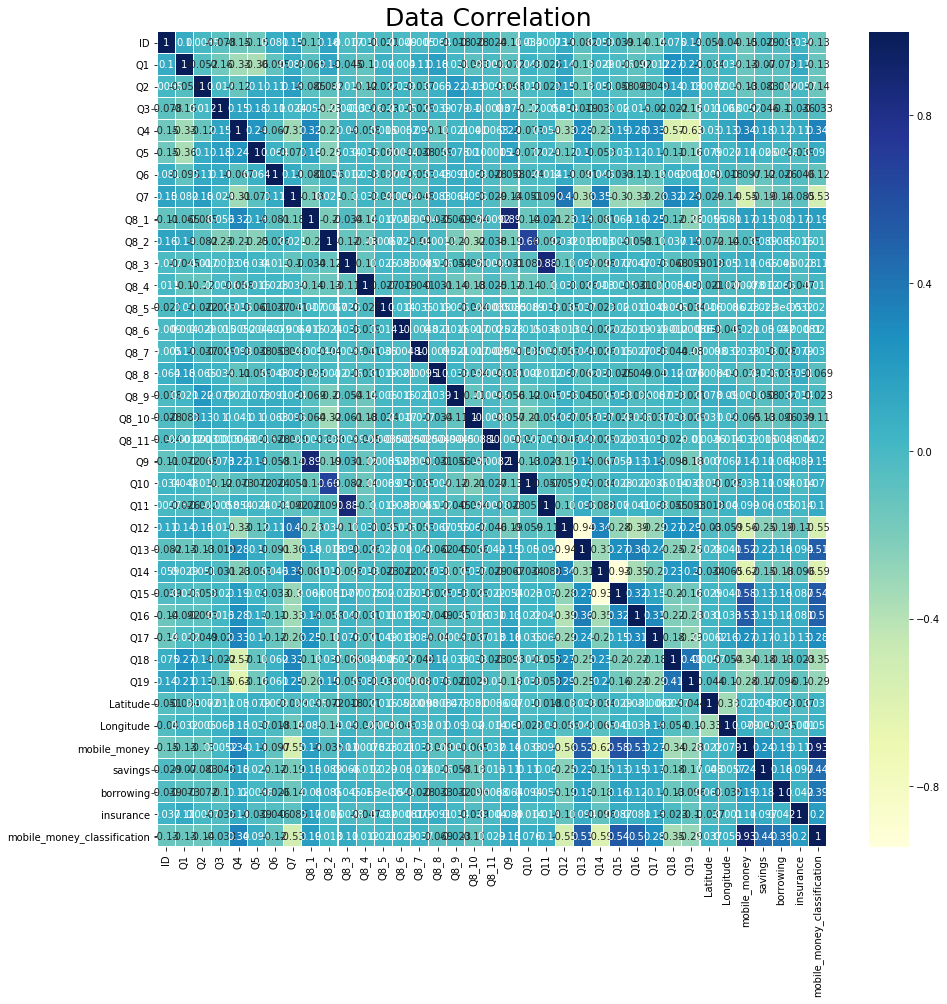

In [9]:
#create the correlation matrix heat map
plt.figure(figsize=(15,15))

plt.title("Data Correlation ", fontsize = 25)
sns.heatmap(data.corr(),linewidths=.1,cmap="YlGnBu", annot=True)

plt.yticks(rotation=0);  

In [10]:
# check correlation again continue_drop column 
pd.DataFrame(abs(data.corr()['mobile_money']).sort_values(ascending = False))  

,mobile_money
mobile_money,1.000000
mobile_money_classification,0.927591
Q14,0.623055
Q15,0.575627
Q12,0.555411
Q7,0.550930
Q16,0.526656
Q13,0.522983
Q18,0.342803
Q4,0.335169


In [11]:
# dropping unused columns
data.drop('ID', axis=1, inplace=True)
data.drop('Q3', axis=1, inplace=True)
data.drop('Q8_8', axis=1, inplace=True)
data.drop('Q8_4', axis=1, inplace=True)
data.head()

,Q1,Q2,Q4,Q5,Q6,Q7,Q8_1,Q8_2,Q8_3,Q8_5,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,98,2,1,1,2,2,0,0,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,40,1,3,5,1,1,1,0,0,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,18,2,6,3,2,1,0,0,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,50,1,3,1,1,1,0,0,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,34,1,1,1,2,1,0,1,0,0,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [12]:
data.shape

(7094, 33)

In [13]:
data.columns

Index(['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_5',
       'Q8_6', 'Q8_7', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Latitude',
       'Longitude', 'mobile_money', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification'],
      dtype='object')

In [14]:
feature = ['Q1', 'Q2', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8_1', 'Q8_2', 'Q8_3', 'Q8_5',
       'Q8_6', 'Q8_7', 'Q8_9', 'Q8_10', 'Q8_11', 'Q9', 'Q10', 'Q11', 'Q12',
       'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Latitude',
       'Longitude', 'savings', 'borrowing', 'insurance',
       'mobile_money_classification']

x= data[feature]
y= data.mobile_money

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import f1_score

In [16]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVC', SVC(gamma='scale')))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))

In [17]:
models = []

models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('SVC', SVC(gamma='scale')))
models.append(('GB', GradientBoostingClassifier()))
models.append(('GNB', GaussianNB()))

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)

In [24]:
names = []
scores = []

for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(f1_score(y_test, y_pred))
    names.append(name)

results = pd.DataFrame({'Model': names, 'f1_score': scores})
results

,Model,f1_score
0,LR,1.000000
1,KNN,0.934234
2,DT,1.000000
3,RF,1.000000
4,SVC,0.997812
5,GB,1.000000
6,GNB,0.926484


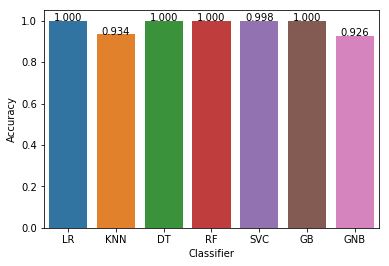

In [25]:
axis = sns.barplot(x ='Model', y ='f1_score', data = results)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.0005, '{:1.3f}'.format(height), ha="center") 
    
plt.show()

In [26]:
from sklearn.feature_selection import RFECV

In [28]:
folds = StratifiedKFold(n_splits=10, random_state=42)

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DENICE KIM\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

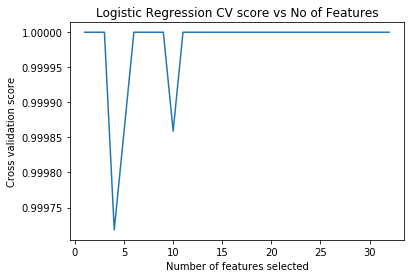

In [31]:
log_reg = LogisticRegression(max_iter=4000)

classifier = RFECV(estimator=log_reg, step=1, cv=folds, scoring='accuracy')
classifier.fit(x, y)

plt.figure()
plt.title('Logistic Regression CV score vs No of Features')
plt.xlabel('Number of features selected')
plt.ylabel('Cross validation score')
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

In [36]:
classifier.grid_scores_.tolist()

[1.0,
 1.0,
 1.0,
 0.9997181112060233,
 0.9998589562764458,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9998589562764456,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [38]:
feature_importance = list(zip(feature, classifier.support_))

keys = []
new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['mobile_money_classification']
